## Importing Libraries

In [78]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.offsetbox import (AnchoredOffsetbox, TextArea)
import statsmodels.formula.api as smf
import requests
import sklearn as skl
from sklearn import datasets
import scipy.stats as spstats
from scipy.special import inv_boxcox

<br><br>

## Functions

In [64]:
def df_index_slice(df, indices, include=True, sort=False, sort_col=None, desc=True):
    """
    ====================================================================================================
    PURPOSE:
    | Given a DataFrame and a list of indices, either exclude or include the rows of thos indices.
    | Then sort the DataFrame on a specific column if desired.
    |
    ==========
    PARAMETERS:
    | df : pandas DataFrame to slice.
    |
    | indices : List of indices to slice the DataFrame by.
    |
    | include : If set to True (default), will include the rows based on the indices provided and will
    |           will exclude others. If set to False, will exclude the rows based on the indices provided
    |           and will include others.
    |
    | sort : If False (default), no sorting will be done on the sliced DataFrame. If True, will sort.
    |
    | sort_col : If sorting enabled, the column name on which sorting will be determined.
    |
    | desc : If True (default), sliced DataFrame will be sorted descending based on the column specified,
    |        else, if False, will be sorted ascending based on the column specified.
    |
    ==========
    OUTPUT:
    |    - A sliced DataFrame
    |
    ====================================================================================================
    """
    
    if include:
        df = df.iloc[df.index.isin(indices)]
    else:
        df = df.iloc[~df.index.isin(indices)]
        
    if sort:
        sort_switch = False if desc else True
        try:
            df = df.sort_values(by=[sort_col], ascending=sort_switch)
        except:
            print(f"Unable to sort!")
    else:
        pass
    
    return df


def invert_transform(value, reversed_transformation=None, pre_xfrm='N', lamb=None, mean=None, std=None, min_val=None, col_sum=None, shift=None):
    """
    ====================================================================================================
    PURPOSE:
    | Given a value and the transformation that was used to transform that value, get the inverse
    | transformation of the value. 
    |
    ==========
    PARAMETERS:
    | value : Value to inverse transform.
    |
    | reversed_transformation : Select the transformation that you want to inverse.
    |    - boxcox
    |    - log
    |    - recip (aka reciprocal)
    |    - reflect
    |    - x2
    |    - normalize
    |    - zscore
    |    - exp
    |
    | pre_xfrm: 
    |    - N : Values were not shifted prior to transformation.
    |    - Y : Values were shifted prior to transformation. In this case you'll need to enter the 
    |          parameters used to shift the values.
    |
    | lamb : Required to inverse boxcox transformation.
    |
    | mean : Required to inverse zscore transformation.
    |
    | std : Required to inverse zscore transformation.
    |
    | min_val : Required to inverse reflect transformation.
    |
    | col_sum : Required to inverse normalization transformation.
    |
    | shift : Amount that values were shifted prior to transformation. Required if pre_xfrm parameter 
    |         set to 'Y' and transformation utilizes shift.
    |
    ==========
    OUTPUT:
    |    - The inverse representation of a value that was transformed.
    |
    ====================================================================================================
    """
    if reversed_transformation == 'boxcox':
        if lamb is None:
            print('Must specify lambda!')
        else:
            rev_val = inv_boxcox(value, lamb)
        return rev_val

    elif reversed_transformation == 'log':
        if pre_xfrm.upper()=='N':
            rev_val = math.exp(value)
        else:
            if shift is None:
                print(f"Enter amount to shift values or set pre_xfrm='N'")
            else:
                rev_val = math.exp(value) - shift
        return rev_val
    
    elif reversed_transformation == 'recip':
        if pre_xfrm.upper()=='N':
            rev_val = (1 / value)
        else:
            if shift is None:
                print(f"Enter amount to shift values or set pre_xfrm='N'")
            else:
                rev_val = (1 / value) - shift
        return rev_val
        
    elif reversed_transformation == 'reflect':
        if min_val is None:
            print(f"Must enter minimum value used to reflect original data!")
        else:
            rev_val = min_val + value
        return rev_val
    
    elif reversed_transformation == 'x2':
        if pre_xfrm.upper()=='N':
            rev_val = math.sqrt(value)
        else:
            if shift is None:
                print(f"Enter amount to shift values or set pre_xfrm='N'")
            else:
                rev_val = (math.sqrt(value)) - shift
                
    elif reversed_transformation == 'normalize':
        if pre_xfrm.upper()=='N':
            if col_sum is None:
                print(f"Must enter the sum used to normalize the original data!")
            else:
                rev_val = col_sum * value
        else:
            if col_sum is None or shift is None:
                print(f"Must enter the sum used to normalize and the amount of shift done prior to normalization!")
            else:
                rev_val = (col_sum * value) - shift
        
    elif reversed_transformation == 'zscore':
        if mean is None or std is None:
            print(f"Must enter mean and standard deviation used to obtain zscore for the data!")
        else:
            rev_val = (value * std) + mean
        
    elif reversed_transformation == 'exp':
        rev_val = np.exp(value)
        
    

<br><br>

## Classes

In [138]:
class SwissDF(object):
    """
    ====================================================================================================
    DEVELOPER: Patrick Weatherford
    
    CLASS OVERVIEW:
        This is the Data Science swiss army knife for a pandas DataFrames!! 
    """
    
    def __init__(self, df):
        """
        ====================================================================================================
        PURPOSE:
        | Instantiate SwissDF object.
        |
        ==========
        PARAMETERS:
        | df : A pandas DataFrame or something that can be converted into a pandas DataFrame. Will first try
        |      to convert the variable into a DataFrame and if unsuccessful, will output an error message.
        |
        ==========
        OUTPUT:
        | SwissDF object created that has an attribute .df for the DataFrame instantiated with the object.
        |
        ====================================================================================================
        """
        try:
            self.df = pd.DataFrame(df)  # try to convert to pandas DataFrame
        except:
            print('Is not or cannot convert to pandas.DataFrame!')
            
            
            
    def df_dist_plot(self, graph_type='histplot', hist_color="grey", kde_color="black"):
        """
        ====================================================================================================
        PURPOSE:
        | Take a DataFrame and plot a histogram/kde plot for each variable in the DataFrame.
        |
        ==========
        PARAMETERS:
        | graph_type : Type of graph to disply.
        |    - histplot (default) - histogram w/KDE
        |    - cdf - Cumulative Distribution Function
        |
        | hist_color : Color of histogram bars.
        | 
        | kde_color : Color of kernel density estimation (kde) line.
        | 
        ==========
        OUTPUT:
        | Multiple plot figures with a shape of rows=1, cols=3. The number of plots depends on the number of
        | variables (aka columns) in the DataFrame.
        |
        ====================================================================================================
        """
        iterations = math.ceil(len(self.df.columns) / 3)
        num_vars = len(self.df.columns)
        var_cnt = 0

        for row in range(iterations):
            fig = plt.figure()
            fig.set_figwidth(fig.get_figwidth() * 3)
            for col in range(3):
                plt_loc = int('13' + str(col+1))
                plt.subplot(plt_loc)
                if var_cnt >= num_vars:
                    pass
                else:
                    if graph_type == 'histplot':
                        sns.histplot(self.df.iloc[:,[var_cnt]]
                                     , kde=True
                                     , alpha=.5
                                     , line_kws={"lw":4}
                                     , facecolor=hist_color
                                     , edgecolor=None
                                    ).lines[0].set_color(kde_color)
                        
                    elif graph_type == 'cdf':
                        sns.ecdfplot(self.df.iloc[:,[var_cnt]])
                    
                var_cnt+=1
            plt.show()
            
            
            
    def get_outlier_info(self, outlier_method='iqr', exclude_cols=None):
        """
        ====================================================================================================
        PURPOSE:
        | Take the object DataFrame attribute and flag outliers for each variable recording the index for
        | each of them in a list. The outlier list will then be instantiated as an attribute and will also
        | be used to instantiate an outlier DataFrame which can be used to review the outliers before taking
        | action on them.
        |
        ==========
        PARAMETERS:
        | outlier_method : Calculation method to define outliers.
        |    - iqr (default) : x < q1 - iqr * 1.5 OR x > q3 + iqr * 1.5
        |    - zscore : If zscore for the variable is > 3
        |
        | exclude_cols : List of column names to exclude from outlier analysis.
        |
        ==========
        OUTPUT:
        |    - object attribute .outlier_indices : list of row indices where any variable has an outlier.
        |    - object attribute .outlier_dict : dictionary of all columns and the outlier row indices for the variable.
        |    - object attribute .outlier_df : DataFrame of all rows where any variable has an outlier.
        |
        |
        ====================================================================================================
        """
        df_copy = self.df
        
        if exclude_cols is None:
            pass
        else:
            df_copy = df_copy.drop([exclude_cols])
        
        indices = []
        outlier_indices = []
        outlier_dict = {}

        if outlier_method == 'zscore':
            for col in df_copy.columns:
                index = df_copy.index[((df_copy[col] - df_copy[col].mean()) / df_copy[col].std()) > 3].tolist()
                indices.extend(index)
                outlier_dict[col] = index

        elif outlier_method == 'iqr':
            for col in df.columns:
                q1 = df_copy[col].quantile(0.25)
                q3 = df_copy[col].quantile(0.75)
                iqr = q3-q1
                lower_bound = q1 - (iqr * 1.5)
                upper_bound = q3 + (iqr * 1.5)
                index = df_copy.index[(df[col] < lower_bound) | (df_copy[col] > upper_bound)].tolist()
                indices.extend(index)
                outlier_dict[col] = index
                
        for i in indices:
            if i in outlier_indices or i is None or i == '':
                pass
            else:
                outlier_indices.append(i)
                
        if len(outlier_indices) > 0:
            self.outlier_indices = outlier_indices
            self.outlier_dict = outlier_dict
            self.outlier_df = self.df.iloc[self.df.index.isin(self.outlier_indices)]
        
        else:
            print(f"No outliers found in DataFrame.")
        
        
        
    def remove_outliers(self, outlier_method='iqr', for_vars='All'):
        """
        ====================================================================================================
        PURPOSE:
        | Remove all variable outlier rows or only outlier rows for specified variables.
        |
        ==========
        PARAMETERS:
        | outlier_method : Calculation method to define outliers.
        |    - iqr (default) : x < q1 - iqr * 1.5 OR x > q3 + iqr * 1.5
        |    - zscore : If zscore for the variable is > 3
        |
        | for_vars : specifiy the rows to remove for specified variables
        |
        ==========
        OUTPUT:
        | Will modify the object DataFrame attribute and remove all variable outlier rows or only outlier 
        | rows for specified variables.
        |
        ====================================================================================================
        """
        df_start_len = len(self.df)
        
        try:
            self.outlier_dict  # check to see if object attribute exists and outlier analysis ran
            pass
        except:
            self.get_outlier_info(outlier_method=outlier_method)
            
            
        if for_vars=='All':
            self.df = self.df.iloc[~self.df.index.isin(self.outlier_indices)]
            df_end_len = len(self.df)
            print(f'{df_start_len-df_end_len} rows removed!')
        else:
            index_holder = []
            index_filter_list = []
            for col in for_vars:
                index_holder.extend(self.outlier_dict[col])
            for i in index_holder:
                if i in index_filter_list:
                    pass
                else:
                    index_filter_list.append(i)
                    
            self.df = self.df.iloc[~self.df.index.isin(index_filter_list)]
            df_end_len = len(self.df)
            print(f'{df_start_len-df_end_len} rows removed!')
            
    
    def col_transform(self, transform_type='log', transform_cols=None):
        """
        ====================================================================================================
        PURPOSE
        | Can be used to transform specific columns into other representations and then add the columns onto 
        | the existing DataFrame associated with the object.
        |
        | Right (positve) skew (from lowest to strongest skew): 
        |    - log
        |    - recip
        |
        | Left (negative) skew (from lowest to strongest skew): 
        |    - reflect (*then must do appropriate right-skew transformation)
        |    - x2
        |    - exp
        |
        ==========
        PARAMETERS
        | transform_type : specify the transformation for the new column
        |    - log : Takes the log of each of the values. Will first check to see if the minimum value for the
        |            column is <= 0. If so, will add the absolute value of the minimum + 1 to ensure no log of
        |            of 0 or negative number.
        |
        |    - recip : (reciprocal) = 1 / value. Will first check to see if the minimum value for the 
        |              column is <= 0. If so, will add the absolute value of the minimum + 1 to ensure no 
        |              log of of 0 or negative number.
        |
        |    - normalize : The data value divided by the sum of the entire column.
        |
        |    - zscore : (data value - mean) / standard deviation
        |
        |    - reflect : Subtract every value from the minimum value. Then perform 
        |
        |    - x2 : Square each value of x
        |
        |    - exp : e**x
        |
        |    - boxcox : scipy.stats.boxcox(x)
        |
        | transform_cols : specify the column names to transform in a list format
        |
        ==========
        OUTPUT:
        |    - Modified object DataFrame attribute with new columns that are transformations of existing columns
        |      specified in the object's DataFrame.
        |
        |    - Object attribute for parameters used for transformation
        |
        ====================================================================================================
        """
        transform_cols = transform_cols
        
        self.xfrm_params = {}

        if transform_cols is None:
            print(f"No columns selected!")

        else:
            if transform_type == 'log':
                for col in transform_cols:
                    new_col_name = col + '_LOG'
                    if self.df[col].min() > 0:
                        self.df[new_col_name] = np.log(self.df[col])  # log(value)
                        self.xfrm_params[new_col_name] = {
                            "PRE_XFRM":'N'
                            ,"SHIFT":0
                            ,"X_FORM":"log(x)"
                        }

                    elif self.df[col].min() <= 0:
                        self.df[new_col_name]=np.log(self.df[col] + abs(self.df[col].min()) + 1)  # log(value accounting for negative & 0)
                        self.xfrm_params[new_col_name] = {  # parameters needed to inverse column values
                            "PRE_XFRM":'Y'
                            ,"SHIFT":abs(self.df[col].min())+1
                            ,"X_FORM":"log(x + abs(min(x)) + 1)"
                        }
                print(f"{transform_type} of {transform_cols} successfully added to object DataFrame!")
            
            
            elif transform_type == "recip":
                for col in transorm_cols:
                    new_col_name = col + '_RECIP'
                    if self.df[col].min() > 1:
                        self.df[new_col_name] = 1 / (self.df[col])  # 1 / value
                        self.xfrm_params[new_col_name] = { 
                            "PRE_XFRM":"N"
                            ,"X_FORM":"1 / x"
                        }
                        
                    elif self.df[col].min() <= 1:
                        self.df[new_col_name] = 1 / (self.df[col] + abs(self.df[col].min()) + 2)  # 1 / value accounting for negative, 1, and 0
                        self.xfrm_params[new_col_name] = {  # parameters needed to inverse column values
                            "PRE_XFRM":"Y"
                            ,"SHIFT":abs(self.df[col].min())+2
                            ,"X_FORM":"1 / (x + abs(min(x)) + 2)"
                        }
                print(f"{transform_type} of {transform_cols} successfully added to object DataFrame!")
                    
            
            elif transform_type == 'normalize':
                for col in transform_cols:
                    new_col_name = col + '_NORMLZ'
                    if self.df[col].min() > 0:
                        self.df[new_col_name] = self.df[col] / sum(self.df[col])  # value / sum of column values
                        self.xfrm_params[new_col_name] = {
                            "PRE_XFRM":"N"
                            ,"SHIFT":0
                            ,"COL_SUM":sum(self.df[col])
                            ,"X_FORM":"x / (sum(x))"
                        }
                    
                    elif self.df[col].min() <= 0:
                        self.df[new_col_name] = (self.df[col] + abs(self.df[col].min()) + 1) / (sum((self.df[col] + abs(self.df[col].min()) + 1)))
                        self.xfrm_params[new_col_name] = {
                            "PRE_XFM":"Y"
                            ,"SHIFT":self.df[col].min()+1
                            ,"COL_SUM":sum(self.df[col])
                            ,"X_FORM":"(x + abs(min(x)) + 1) / (sum( (x + abs(min(x)) + 1) ))"
                        }
                print(f"{transform_type} of {transform_cols} successfully added to object DataFrame!")
                        
                        
            elif transform_type == 'zscore':
                for col in transform_cols:
                    new_col_name = col + '_Z'
                    self.df[new_col_name] = (self.df[col] - self.df[col].mean()) / self.df[col].std()
                    self.xfrm_params[new_col_name] = {
                        "MEAN":self.df[col].mean()
                        ,"STD":self.df[col].std()
                        ,"X_FORM":"(x - mean(x)) / std(x)"
                    }
                print(f"{transform_type} of {transform_cols} successfully added to object DataFrame!")
                        
                    
            elif transform_type == 'reflect':
                for col in transform_cols:
                    new_col_name = col + '_REFLECT'
                    self.df[new_col_name] = self.df[col].min() - self.df[col]  # min - value
                    self.xfrm_params[new_col_name] = {
                        "ABS_MIN":abs(self.df[col].min())
                        ,"X_FORM":"min(x) - x"
                    }
                print(f"{transform_type} of {transform_cols} successfully added to object DataFrame!")
                        
                    
            elif transform_type == 'x2':
                for col in transform_cols:
                    new_col_name = col + '_X2'
                    if self.df[col].min() > 0:
                        self.df[new_col_name] = self.df[col]**2
                        self.xfrm_params[new_col_name] = {
                            "PRE_XFRM":"N"
                            ,"SHIFT":0
                            ,"X_FORM":"x**2"
                        }
                    elif self.df[col].min() <= 0:
                        self.df[new_col_name] = self.df[col] + abs(self.df[col].min())
                        self.xfrm_params[new_col_name] = {
                            "PRE_XFRM":"Y"
                            ,"SHIFT":abs(self.df[col].min())
                            ,"X_FORM":"( x + abs(min(x)) )**2"
                        }
                        
                        
            elif transform_type == 'exp':
                for col in transform_cols:
                    new_col_name = col + '_EXP'
                    self.df[new_col_name] = (match.e)**self.df[col]  # exponentiating values
                    self.xfrm_params[new_col_name] = {
                        "PRE_XFRM":"N"
                        ,"X_FORM":"e**x"
                    }
                    
                    
            elif transform_type == 'boxcox':
                for col in transform_cols:
                    new_col_name = col + '_BOXCOX'
                    self.df[new_col_name], lamb = spstats.boxcox(self.df[col])
                    self.xfrm_params[new_col_name] = {
                        "PRE_XFRM":"N"
                        ,"LAMBDA":lamb
                        ,"X_FORM":"scipy.stats.boxcox(x)"
                    }
                    
                    
    def corr_hm(self, method='pearson', cmap='bwr'):

        fig, ax = plt.subplots(figsize=(6,1))
        fig.subplots_adjust(bottom=0.6)
        ax.set_facecolor('black')

        cm = eval(f"mpl.cm.{cmap}")
        norm = mpl.colors.Normalize(vmin=-1, vmax=1)

        cbar = mpl.colorbar.ColorbarBase(ax
                                        , cmap=cm
                                        , norm=norm
                                        , orientation='horizontal')
        ax.set_facecolor('yellow')
        plt.title("Correlation")
        plt.show()
        
        corr_hm = self.df.corr(method='pearson').style.background_gradient(cmap=cm, vmin=-1, vmax=1)
        return corr_hm
                        
                        

<br><br>

## Testing

In [43]:
## regression data set
cal_housing_df = datasets.fetch_california_housing(as_frame=True).data
cal_housing_df['MEDIAN_PRICE'] = datasets.fetch_california_housing(as_frame=True).target

## classification data set
iris_df = datasets.load_iris(as_frame=True)

In [44]:
new_col_names = [
    "MEDIAN_INCOME"
    ,"MEDIAN_HOUSE_AGE"
    ,"AVG_ROOMS"
    ,"AVG_BEDROOMS"
    ,"BLOCK_POP"
    ,"AVG_HOUSE_OCC"
    ,"LAT"
    ,"LON"
    ,"MEDIAN_PRICE"
]

cal_housing_df.columns = new_col_names

In [45]:
df = cal_housing_df

df1 = SwissDF(df)

df1.df

,MEDIAN_INCOME,MEDIAN_HOUSE_AGE,AVG_ROOMS,AVG_BEDROOMS,BLOCK_POP,AVG_HOUSE_OCC,LAT,LON,MEDIAN_PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


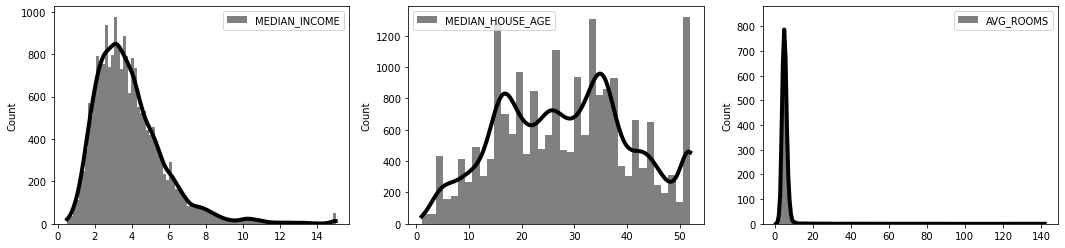

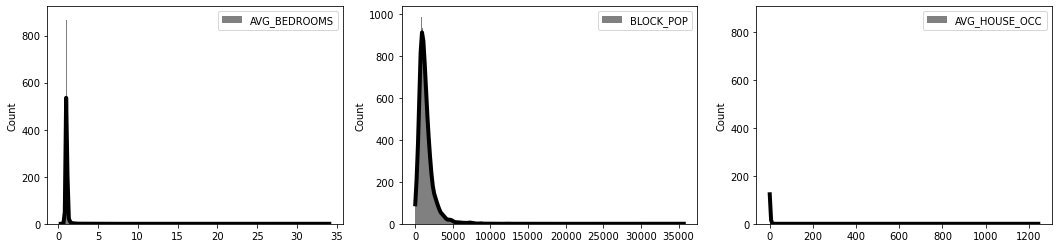

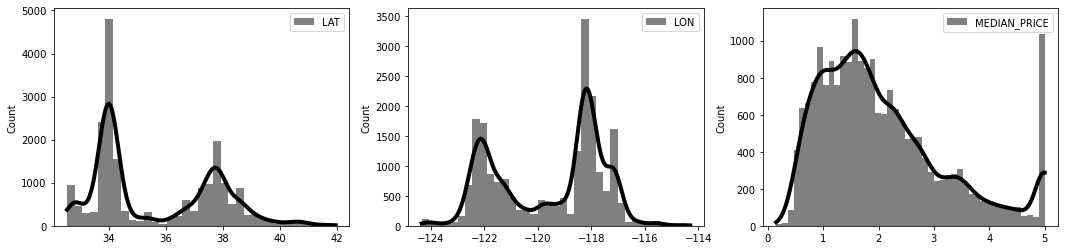

In [46]:
df1.df_dist_plot()  # takes forever to run due to crazy outliers

In [47]:
df1.df.describe()

,MEDIAN_INCOME,MEDIAN_HOUSE_AGE,AVG_ROOMS,AVG_BEDROOMS,BLOCK_POP,AVG_HOUSE_OCC,LAT,LON,MEDIAN_PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<br>

What in the world is going on with **[AVG_HOUSE_OCC]**, **[AVG_ROOMS]**, and **[AVG_BEDROOMS]**??

In [48]:
df1.get_outlier_info(outlier_method='iqr')

df_index_slice(df1.df
               , df1.outlier_dict['AVG_HOUSE_OCC']
               , sort=True, sort_col='AVG_HOUSE_OCC'
               , desc=True).head(30)

,MEDIAN_INCOME,MEDIAN_HOUSE_AGE,AVG_ROOMS,AVG_BEDROOMS,BLOCK_POP,AVG_HOUSE_OCC,LAT,LON,MEDIAN_PRICE
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.37500
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.67500
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.50000
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.25000
9172,4.2391,5.0,5.123810,0.933333,8733.0,83.171429,34.47,-118.59,1.54600
12104,1.6250,8.0,7.600000,0.950000,1275.0,63.750000,33.97,-117.33,1.62500
16420,5.7485,26.0,5.366667,0.900000,1542.0,51.400000,37.89,-121.29,1.62500
8874,9.3370,52.0,7.285714,1.214286,1154.0,41.214286,34.06,-118.45,5.00001
13366,4.2578,36.0,5.258824,1.117647,2886.0,33.952941,33.94,-117.63,1.83300
5986,1.8750,52.0,4.500000,1.206349,2688.0,21.333333,34.10,-117.71,2.12500


In [49]:
df_index_slice(df1.df
               , df1.outlier_dict['AVG_ROOMS']
               , sort=True, sort_col='AVG_ROOMS'
               , desc=True).head(30)

,MEDIAN_INCOME,MEDIAN_HOUSE_AGE,AVG_ROOMS,AVG_BEDROOMS,BLOCK_POP,AVG_HOUSE_OCC,LAT,LON,MEDIAN_PRICE
1914,1.8750,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.6250,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500
12447,1.6154,17.0,62.422222,14.111111,83.0,1.844444,33.97,-114.49,0.87500
1913,4.0714,19.0,61.812500,11.000000,112.0,2.333333,39.01,-120.06,4.37500
11862,2.6250,25.0,59.875000,15.312500,28.0,1.750000,40.27,-121.25,0.67500
1912,4.9750,16.0,56.269231,10.153846,54.0,2.076923,39.01,-120.16,2.06300
9676,3.2431,14.0,52.848214,11.410714,265.0,2.366071,37.64,-119.02,2.21400
11707,1.1912,22.0,52.690476,8.857143,98.0,2.333333,39.15,-120.06,1.70000
2395,3.8750,23.0,50.837838,10.270270,64.0,1.729730,37.12,-119.34,1.25000
1240,3.1250,11.0,47.515152,11.181818,82.0,2.484848,38.42,-120.19,0.77500


In [50]:
df_index_slice(df1.df
               , df1.outlier_dict['AVG_BEDROOMS']
               , sort=True, sort_col='AVG_BEDROOMS'
               , desc=True).head(30)

,MEDIAN_INCOME,MEDIAN_HOUSE_AGE,AVG_ROOMS,AVG_BEDROOMS,BLOCK_POP,AVG_HOUSE_OCC,LAT,LON,MEDIAN_PRICE
1979,4.6250,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500
1914,1.8750,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
11862,2.6250,25.0,59.875000,15.312500,28.0,1.750000,40.27,-121.25,0.67500
12447,1.6154,17.0,62.422222,14.111111,83.0,1.844444,33.97,-114.49,0.87500
9676,3.2431,14.0,52.848214,11.410714,265.0,2.366071,37.64,-119.02,2.21400
1240,3.1250,11.0,47.515152,11.181818,82.0,2.484848,38.42,-120.19,0.77500
1913,4.0714,19.0,61.812500,11.000000,112.0,2.333333,39.01,-120.06,4.37500
2395,3.8750,23.0,50.837838,10.270270,64.0,1.729730,37.12,-119.34,1.25000
1912,4.9750,16.0,56.269231,10.153846,54.0,2.076923,39.01,-120.16,2.06300
1102,2.4028,17.0,31.777778,9.703704,47.0,1.740741,40.06,-121.54,0.67500


<br><br>

After searching the Latitude/Longitude on Google, it looks like a lot of places where the AVG_HOUSE_OCC, AVG_BEDROOMS, and AVG_ROOOMS is high are places like colleges, prisons, communities, resorts, etc. If we are looking specifically at house prices, I think it would be safe to remove these.

In [51]:
df1.remove_outliers(for_vars=['AVG_ROOMS','AVG_BEDROOMS','AVG_HOUSE_OCC'])

2235 rows removed!


<br><br>

Now lets see what the distributions look like.

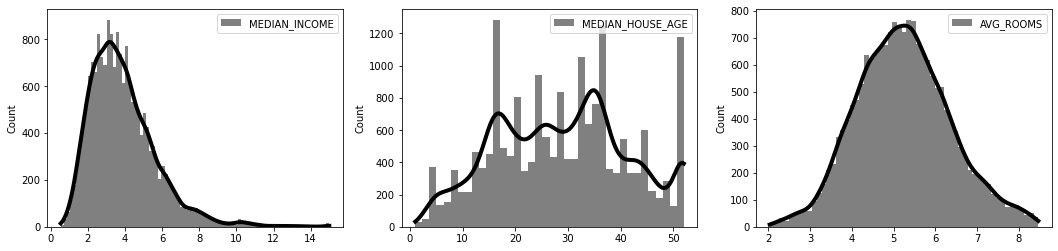

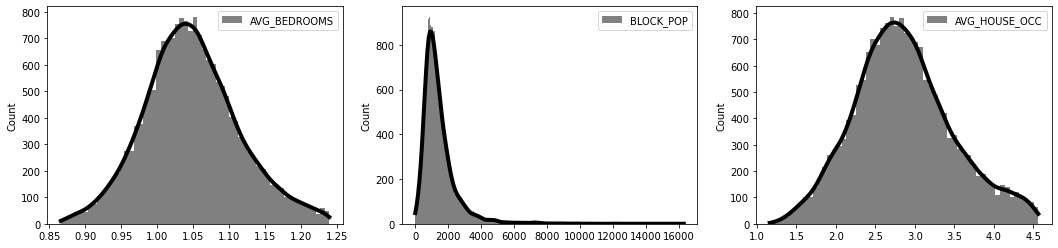

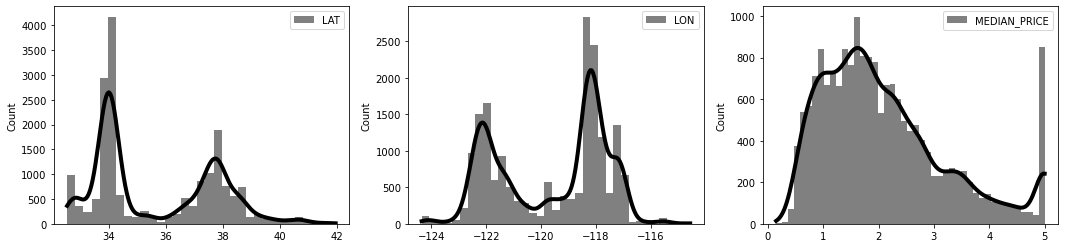

In [52]:
df1.df_dist_plot()

<br><br>

Now I'm curious about the outliers for **[MEDIAN_HOUSE_AGE]** and **[MEDIAN_PRICE]**


In [53]:
df_index_slice(df1.df
               , df1.outlier_dict['MEDIAN_HOUSE_AGE']
               , sort=True, sort_col='MEDIAN_HOUSE_AGE'
               , desc=True).head(30)

,MEDIAN_INCOME,MEDIAN_HOUSE_AGE,AVG_ROOMS,AVG_BEDROOMS,BLOCK_POP,AVG_HOUSE_OCC,LAT,LON,MEDIAN_PRICE


No outliers detected for **[MEDIAN_HOUSE_AGE]**

<br><br>

In [54]:
df_index_slice(df1.df
               , df1.outlier_dict['MEDIAN_PRICE']
               , sort=True, sort_col='MEDIAN_PRICE'
               , desc=True).head(30)

,MEDIAN_INCOME,MEDIAN_HOUSE_AGE,AVG_ROOMS,AVG_BEDROOMS,BLOCK_POP,AVG_HOUSE_OCC,LAT,LON,MEDIAN_PRICE
9381,11.5706,36.0,7.682131,1.061856,1315.0,2.259450,37.87,-122.47,5.00001
16020,10.6605,50.0,7.379464,1.125000,641.0,2.861607,37.73,-122.47,5.00001
15234,6.4651,25.0,5.481953,1.050955,1088.0,2.309979,32.97,-117.26,5.00001
15235,10.1768,36.0,6.102837,0.936170,710.0,2.517730,32.96,-117.26,5.00001
15236,5.6582,34.0,6.092251,1.007380,650.0,2.398524,32.95,-117.26,5.00001
15237,4.4375,22.0,5.418972,1.212451,1947.0,1.923913,32.95,-117.26,5.00001
15288,3.5341,15.0,5.681710,1.059382,747.0,1.774347,33.10,-117.31,5.00001
15303,2.3182,24.0,5.574932,1.204360,812.0,2.212534,33.17,-117.36,5.00001
15614,3.6728,25.0,2.671202,1.235828,592.0,1.342404,37.81,-122.41,5.00001
15615,1.8981,31.0,3.323064,1.091590,2305.0,1.919234,37.81,-122.41,5.00001


After review, the high price homes seem to located in fancy-pants-ville so I think those outliers should stay. 

<br><br>

I still think we can clean the data a little further. For the next step, I'll attempt to make some the right-skewed data more normal by taking the boxcox transformation of those columns.

In [55]:
transform_cols = [
    'MEDIAN_INCOME'
    ,'BLOCK_POP'
    ,'MEDIAN_PRICE'
]

df1.col_transform(transform_type='boxcox', transform_cols=transform_cols)

<ipython-input-42-abafbe1e0817>:384: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[new_col_name], lamb = spstats.boxcox(self.df[col])


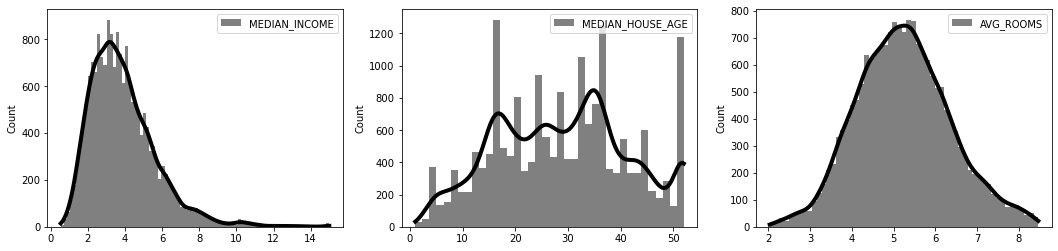

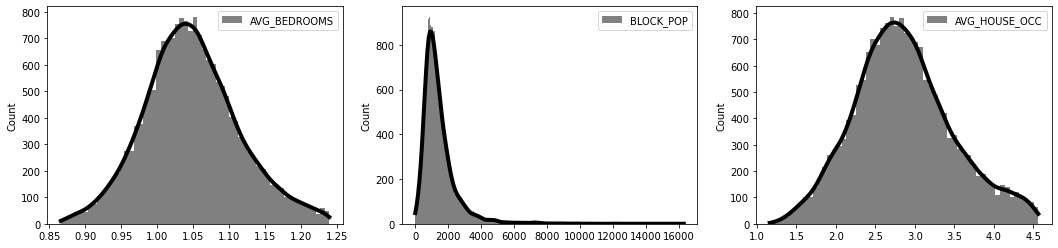

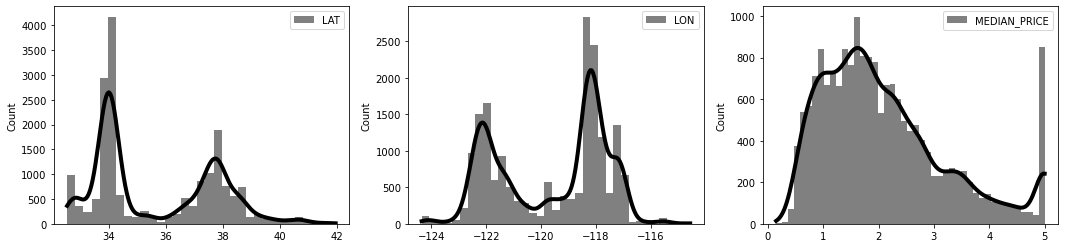

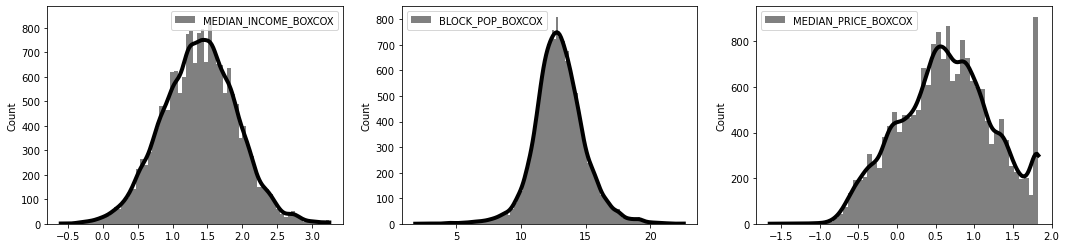

In [56]:
df1.df_dist_plot()

I'm liking that **[BLOCK_POP_LOG]**, **[MEDIAN_INCOME_LOG]**,  now taking on a more normal distribution. I think I'll use that moving forward. 

Ok final data set.

In [140]:
df1.df = df1.df.drop(columns=['MEDIAN_INCOME','BLOCK_POP','MEDIAN_PRICE'])

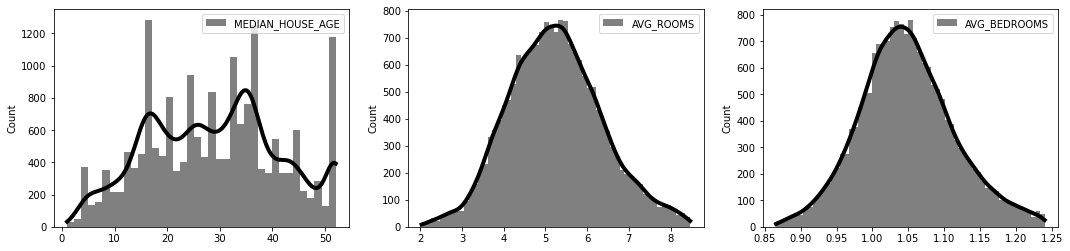

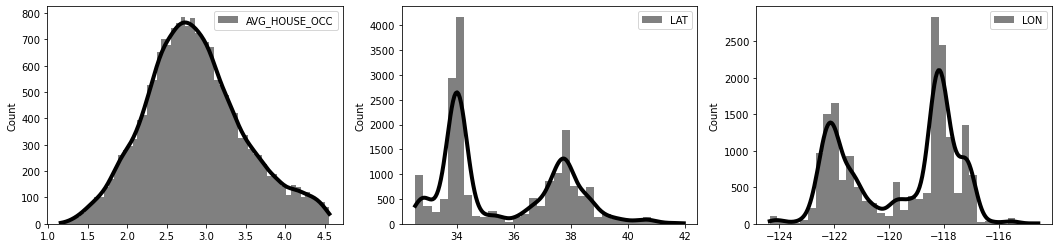

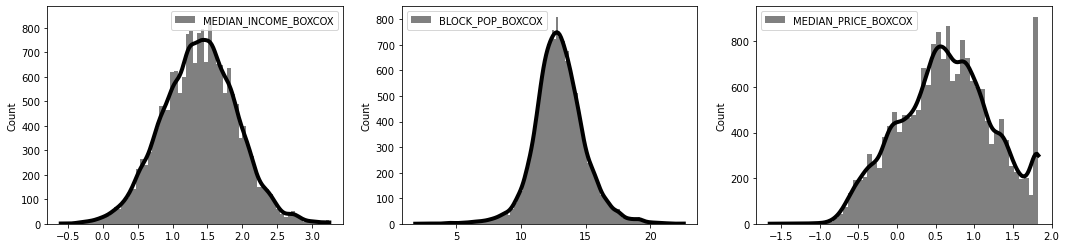

In [141]:
df1.df_dist_plot()

<br><br>

Example of how to revert value in transformed distribution back to a meaningful value

In [142]:
## first find the parameters used in the transformation for each transformed column
df1.xfrm_params

AttributeError: 'SwissDF' object has no attribute 'xfrm_params'

<br><br>

After parameters found, use those to transform to a meaningful representation

In [143]:
boxcox_mean = df1.df['BLOCK_POP_BOXCOX'].mean()
reg_mean = invert_transform(boxcox_mean, reversed_transformation='boxcox', lamb=df1.xfrm_params['BLOCK_POP_BOXCOX']['LAMBDA'])

boxcox_mean, reg_mean

AttributeError: 'SwissDF' object has no attribute 'xfrm_params'

<br><br>

Correlation heatmap

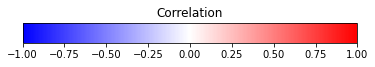

,MEDIAN_HOUSE_AGE,AVG_ROOMS,AVG_BEDROOMS,AVG_HOUSE_OCC,LAT,LON,MEDIAN_INCOME_BOXCOX,BLOCK_POP_BOXCOX,MEDIAN_PRICE_BOXCOX
MEDIAN_HOUSE_AGE,1.000000,-0.198827,-0.077411,-0.042778,0.021585,-0.106019,-0.149572,-0.323242,0.083063
AVG_ROOMS,-0.198827,1.000000,-0.024393,0.054800,0.106324,-0.081308,0.721989,-0.039429,0.322218
AVG_BEDROOMS,-0.077411,-0.024393,1.000000,-0.095728,0.021422,0.008378,-0.242016,0.096185,-0.103809
AVG_HOUSE_OCC,-0.042778,0.054800,-0.095728,1.000000,-0.152933,0.179412,-0.069639,0.216956,-0.283794
LAT,0.021585,0.106324,0.021422,-0.152933,1.000000,-0.934639,-0.080790,-0.116288,-0.182236
LON,-0.106019,-0.081308,0.008378,0.179412,-0.934639,1.000000,-0.014318,0.116312,-0.023816
MEDIAN_INCOME_BOXCOX,-0.149572,0.721989,-0.242016,-0.069639,-0.080790,-0.014318,1.000000,0.009765,0.681468
BLOCK_POP_BOXCOX,-0.323242,-0.039429,0.096185,0.216956,-0.116288,0.116312,0.009765,1.000000,-0.010733
MEDIAN_PRICE_BOXCOX,0.083063,0.322218,-0.103809,-0.283794,-0.182236,-0.023816,0.681468,-0.010733,1.000000


In [144]:
df1.corr_hm()

In [11]:
import numpy as np

In [41]:
## create date index and column for vals 
dates = pd.Index(pd.date_range('2020-02-01', '2020-02-17')).set_names('dates')
vals = np.random.choice(range(50), size=len(dates))

## create DataFrame with above cols
df = pd.DataFrame({'vals':vals}, index=dates)
df

,vals
dates,
2020-02-01,29
2020-02-02,3
2020-02-03,1
2020-02-04,0
2020-02-05,7
2020-02-06,30
2020-02-07,14
2020-02-08,15
2020-02-09,44


In [ ]:

span = 3
a = 2/(span+1)
n = len(df)




In [42]:
df['ewma'] = df.ewm(span=3, adjust=False).mean()
df

,vals,ewma
dates,,
2020-02-01,29,29.000000
2020-02-02,3,16.000000
2020-02-03,1,8.500000
2020-02-04,0,4.250000
2020-02-05,7,5.625000
2020-02-06,30,17.812500
2020-02-07,14,15.906250
2020-02-08,15,15.453125
2020-02-09,44,29.726562
